## Record audio sample using microphone

Let's record an audio sample from a microphone on your PC using Jupyter notebook/lab's `ipywebrtc` extension.

In [1]:
from ipywebrtc import AudioRecorder, CameraStream
import torchaudio
from IPython.display import Audio

By executing the following code block, an widget shows up to let you record audio.

In [2]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

Click the circle button (⏺) in above widget to start recording an audio sample using your microphone.
Once done, click the button again, and it will re-play what's recorded.

### ⚠ Attention : Microphone access

When you click the ⏺ botton, your web browser may show a pop-up to ask you to allow it to use your microphone.
Be sure to allow the access.

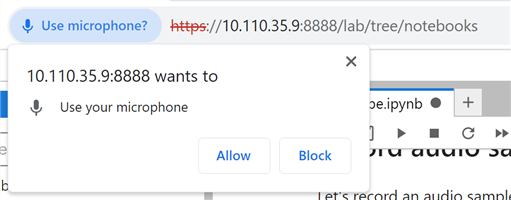

Save the recorded audio as a WAV file. 

In [ ]:
recorder.save('example.wav')

## Run Whisper

In [ ]:
import whisper

model = whisper.load_model("medium")

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("example.wav")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

In [ ]:
# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)